In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.style as style

# Data preparation 

First, we read the CSV file into our notebook to have a better look at the dataset.

In [2]:
df = pd.read_csv('group-project-data.csv')

Then we transform the date variables into years for ease of interpretation in the plots and graphs that will be presented later on. We also transform the funding entries into a numeric value. Additionally, we transform the funding amount into billion for ease of comprehension in further analysis. 

In [3]:
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['founded_at'] = df['founded_at'].dt.year

df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['first_funding_year'] = df['first_funding_at'].dt.year

df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['last_funding_year'] = df['last_funding_at'].dt.year

df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])
df['funding_total_usd'] = df['funding_total_usd'] / 1000000000

We then transform the category variable into a list of objects by eliminating the separator.

In [4]:
df['category_list'] = df['category_list'].fillna('N')

for x in df.index:
    if (df['category_list'].values[x]).startswith('|'):
        df['category_list'].values[x] = df['category_list'].values[x][1:-1]
        df['category_list'].values[x] = df['category_list'].values[x].split('|')

We run some standard data exploration commands in order to get to know our data better. 

In [6]:
print(df.shape)

(28729, 16)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                28729 non-null  object        
 1   homepage_url        27563 non-null  object        
 2   category_list       28729 non-null  object        
 3   market              27896 non-null  object        
 4   funding_total_usd   28729 non-null  float64       
 5   status              28085 non-null  object        
 6   country_code        28729 non-null  object        
 7   state_code          20314 non-null  object        
 8   region              28729 non-null  object        
 9   city                28729 non-null  object        
 10  funding_rounds      28729 non-null  int64         
 11  founded_at          28729 non-null  int64         
 12  first_funding_at    28729 non-null  datetime64[ns]
 13  last_funding_at     28729 non-null  datetime64

In [5]:
df.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_year,last_funding_year
count,2.872900e+04,28729.000000,28729.000000,28729.000000,28729.000000
mean,1.572875e-02,1.994222,2007.866302,2010.592920,2011.780361
std,7.658772e-02,1.499803,4.802865,2.864151,2.458526
min,1.400000e-08,1.000000,1990.000000,1990.000000,1990.000000
25%,4.000000e-04,1.000000,2005.000000,2009.000000,2011.000000
50%,2.075000e-03,1.000000,2009.000000,2011.000000,2013.000000
75%,1.025000e-02,2.000000,2012.000000,2013.000000,2014.000000
max,5.700000e+00,18.000000,2014.000000,2014.000000,2014.000000


# Data exploration

In [5]:
style.use('seaborn-notebook')
style.use('seaborn-whitegrid') 
style.use('seaborn-pastel')

We will first have a look at market values provided and try to answer some of the most pressing questions in a start-up funding scenario. The data itself speaks a lot about market trends occuring in this specific context. 

### Which are the most popular markets for start ups? 

The charts below both highlight the 10 most popular markets in startups throughout all the years included in the dataset. As clearly shown, almost half of the share of startups operate in the Software, Biotechnology and Mobile market. 

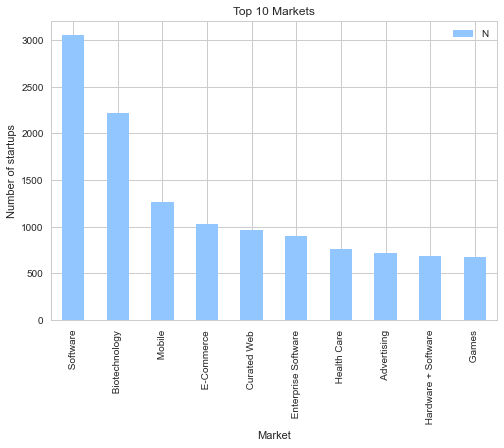

In [8]:
top_markets = df["market"].value_counts().head(10)
top_markets.plot.bar(y = 'market')
plt.ylabel('Number of startups')
plt.legend('No of startups')
plt.xlabel('Market')
plt.title('Top 10 Markets');

Next, we focus on funding and take a look at which are the most funded cities, markets and startups throughout the years. 

### Are these markets just as popular of funding?

It would be interesting to see whether investors have followed the same trends as the startup founders in terms of market preference. 

The bar chart below shows that Biotechnology and Software are still very much preferred. However, Healthcare has received more funding in comparison to how many companies operate in the market.

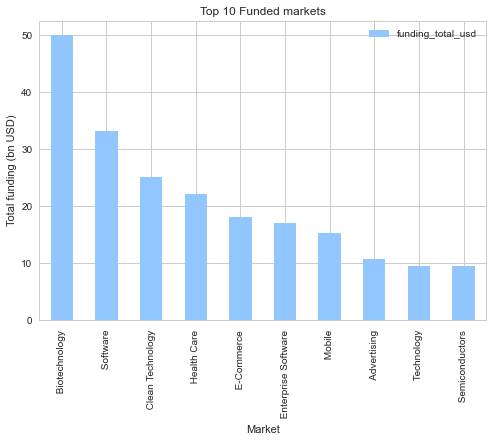

In [57]:
df_grouped_markets = df.groupby('market')['funding_total_usd'].sum().reset_index()
df_grouped_markets  = df_grouped_markets.sort_values(by='funding_total_usd', ascending=False)
df_grouped_markets  =df_grouped_markets.reset_index(drop=True)
df_grouped_markets.head(10).plot.bar(x='market', y='funding_total_usd');
plt.title('Top 10 Funded markets')
plt.xlabel('Market')
plt.ylabel('Total funding (bn USD)');

### Which are the most funded countries?

We use the country code as a basis to group the amount of funds that each country has received. Here the top 10 countries that received the most funds are shown visually. Each depiction shows a clear pattern of the US being the country that has received the most start up investments, followed by China and the UK.

In [60]:
df_grouped = df.groupby('country_code')['funding_total_usd'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='funding_total_usd', ascending=False)
df_grouped = df_grouped.reset_index(drop=True)


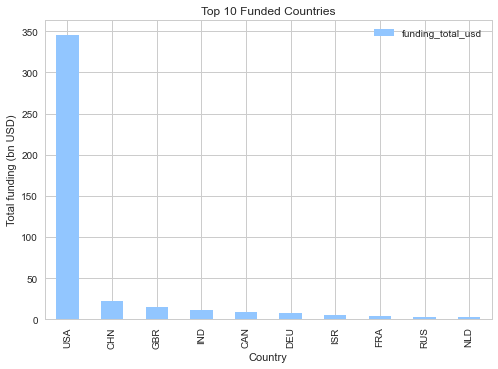

In [16]:
df_grouped.head(10).plot.bar(x='country_code', y='funding_total_usd')
plt.title('Top 10 Funded Countries')
plt.xlabel('Country')
plt.ylabel('Total funding (bn USD)')
plt.show()

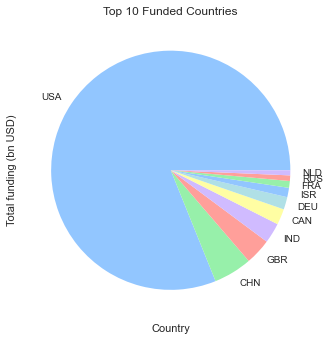

In [17]:
labels = df_grouped['country_code'].head(10).values
df_grouped.head(10).plot.pie(x='country_code', y='funding_total_usd', labels=labels, legend=None)
plt.title('Top 10 Funded Countries')
plt.xlabel('Country')
plt.ylabel('Total funding (bn USD)')
plt.show();

### Which are the countries that have received most funds besides the US?

Given the overpowering presence of the US we exclude it from our next graphical representation to have a closer look to the rest of the world in order to gain a deeper insight of other geographical markets.

In [61]:
df_grouped_no_us = df_grouped.iloc[1:]

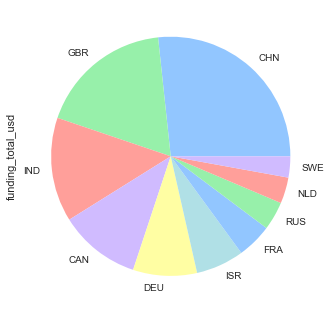

In [26]:
labels = df_grouped_no_us['country_code'].head(10).values
df_grouped_no_us.head(10).plot.pie(x='country_code', y='funding_total_usd', labels=labels, legend=None)
plt.show()

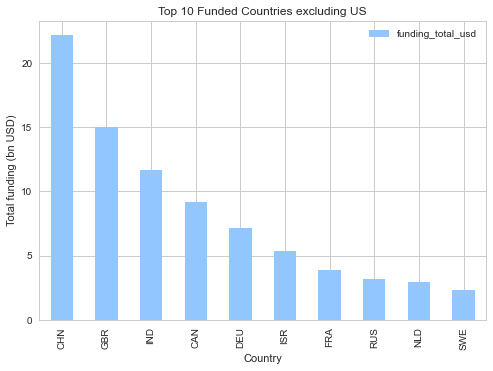

In [39]:
df_grouped_no_us.head(10).plot.bar(x='country_code', y='funding_total_usd')
plt.title('Top 10 Funded Countries excluding US')
plt.xlabel('Country')
plt.ylabel('Total funding (bn USD)')
plt.show()

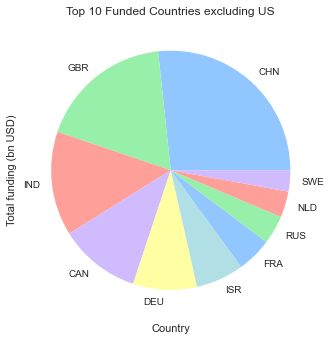

In [40]:
labels = df_grouped_no_us['country_code'].head(10).values
df_grouped_no_us.head(10).plot.pie(x='country_code', y='funding_total_usd', labels=labels, legend=None)
plt.title('Top 10 Funded Countries excluding US')
plt.xlabel('Country')
plt.ylabel('Total funding (bn USD)')
plt.show();

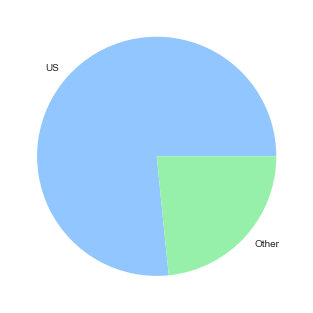

In [20]:
tot_funding_us = df_grouped.iloc[0].loc['funding_total_usd']
tot_funding_rest = df_grouped_no_us['funding_total_usd'].sum()
tot = (tot_funding_us+tot_funding_rest)
y = [(tot_funding_us/tot)*100, (tot_funding_rest/tot)*100]
country = ['US', 'Other']

plt.pie(y, labels=country)
plt.show();

### How has funding changed over years?

The graphs below explore how funding has increased over years. We take the cummulative sum of the funding amounts and their average to check how they have grown across the provided time period. Lastly, we take the count of startups per year to give context to the observed funding trend.

As expected up until 2005, companies had increasing funding on average, but from 2005 onwards, the amount of companies being funded increased and therefore the increase in total USD invested per company on average has slowed.

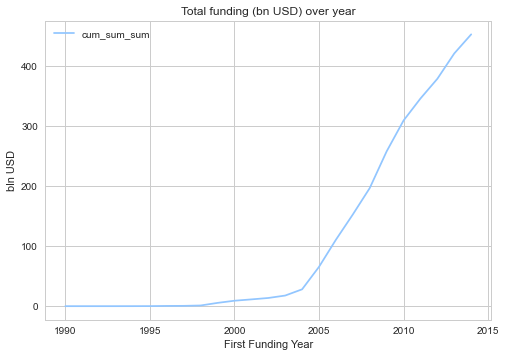

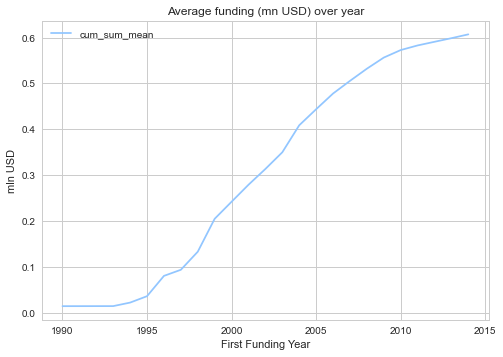

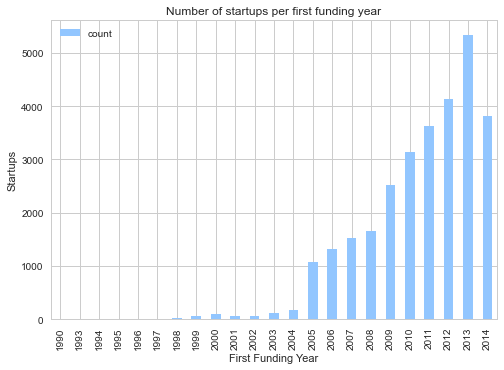

In [22]:
df_grouped_year = df.groupby('first_funding_year')['funding_total_usd'].agg(['sum', 'mean', 'count']).reset_index()

df_grouped_year = df.groupby('first_funding_year')['funding_total_usd'].agg(['sum', 'mean', 'count']).reset_index()

df_grouped_year['cum_sum_sum'] = df_grouped_year['sum'].cumsum() 

df_grouped_year['cum_sum_mean'] = df_grouped_year['mean'].cumsum() 


df_grouped_year.plot(x='first_funding_year', y='cum_sum_sum')
plt.xlabel('First Funding Year')
plt.ylabel('bln USD')
plt.title('Total funding (bn USD) over year')
plt.show()

df_grouped_year.plot(x='first_funding_year', y='cum_sum_mean')
plt.xlabel('First Funding Year')
plt.ylabel('mln USD')
plt.title('Average funding (mn USD) over year')
plt.show()

df_grouped_year.plot.bar(x='first_funding_year', y='count')
plt.xlabel('First Funding Year')
plt.ylabel('Startups')
plt.title('Number of startups per first funding year')
plt.show()  


### What is the average funding per start-up according to the number of funding rounds?

Next we take a closer look into the relationship between funding and funding rounds. 

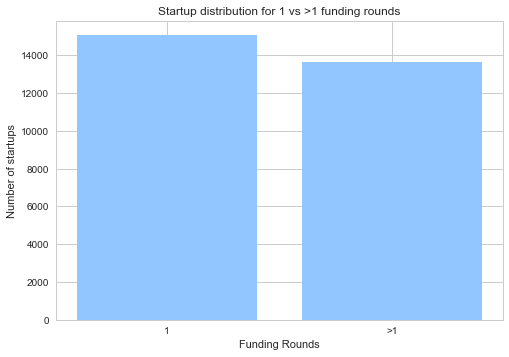

In [41]:
one_round= len(df[df['funding_rounds'] == 1])
more_rounds= len(df[df['funding_rounds'] != 1])
round_distribution = [one_round, more_rounds]
labels = ['1', '>1']
plt.bar(labels, round_distribution)
plt.title('Startup distribution for 1 vs >1 funding rounds')
plt.xlabel('Funding Rounds')
plt.ylabel('Number of startups')
plt.show()

More specifically, how wany start-ups got how many rounds? The bar chart below shows that most startups got approximately 1-2 founding rounds.

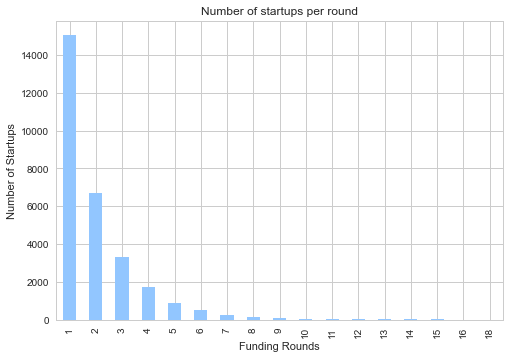

In [43]:
df_gr_round = df.groupby(by='funding_rounds')['funding_rounds'].count().reset_index(name="count")
df_gr_round.plot.bar(x='funding_rounds', y='count', legend=None)
plt.title('Number of startups per round')
plt.xlabel('Funding Rounds')
plt.ylabel('Number of Startups')
plt.show();

Next, we take a look at the amount invested per each round. The highest amount of money as expected goes towards the first 1-4 rounds of funding, after which the amounts start to decline.

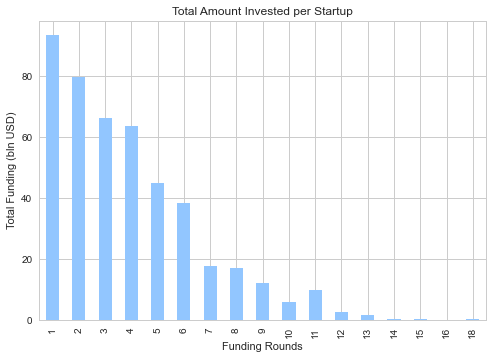

In [11]:
df_gr_round_inv = df.groupby(by='funding_rounds')['funding_total_usd'].sum().reset_index(name="sum")
df_gr_round_inv.plot.bar(x='funding_rounds', y='sum', legend=None)
plt.title('Total Amount Invested per Startup')
plt.xlabel('Funding Rounds')
plt.ylabel('Total Funding (bln USD)')
plt.show();

### When were most start ups founded? 

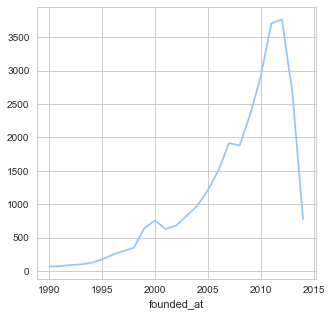

In [65]:
plt.figure(figsize=(5,5))
df["name"].groupby(df["founded_at"]).count().plot();

### Which are the most funded start ups?

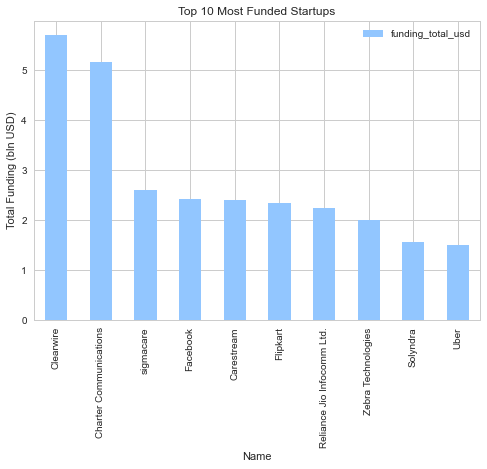

In [10]:
df_sorted = df.sort_values(by=['funding_total_usd'], ascending = False)
df_top10 = pd.DataFrame(df_sorted[['name','funding_total_usd']].head(10))
df_top10.plot(x = 'name', kind= 'bar');
plt.title('Top 10 Most Funded Startups')
plt.xlabel('Name')
plt.ylabel('Total Funding (bln USD)');

### Which were the most attractive cities for start ups?

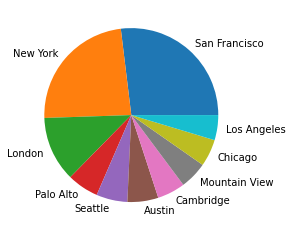

In [10]:
df["city"].value_counts().head(10).plot(kind="pie", label = '');

### Which cities received most funding?

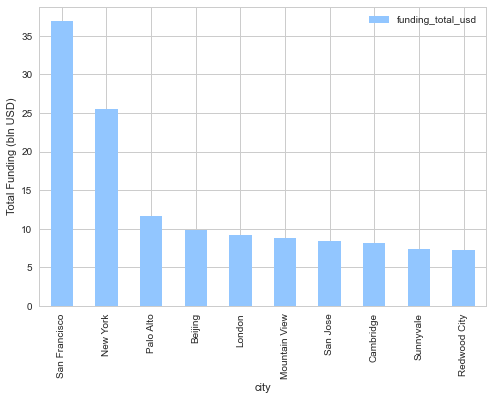

In [13]:
df_city =df[["city",'funding_total_usd']].groupby('city').sum()
df_city_sorted = df_city.sort_values(by=['funding_total_usd'], ascending = False)
df_city_sorted.head(10).plot(kind = 'bar');
plt.ylabel('Total Funding (bln USD)');


### What is the status of the startups according to the average amount of funding they received throughout rounds?

We try to understand whether there is a relationship between the status the company holds and the average amount of funding these companies receive throughout how many rounds.

To achieve this we first find  and define the status array. 

In [45]:
df_status = df.dropna(subset=['status'])
status = df_status['status'].unique()

Next we find status per funding round and combine together in one dataframe. Finally, we transpose the table for a more comprehensible overview and better plotting possibilities.

In [46]:
funding_rounds = df_gr_round['funding_rounds'].values
new_df = pd.DataFrame(status)
new_df = new_df.rename(columns={0:'status'})
for i in funding_rounds:
    temp_df = df[df['funding_rounds'] == i]
    temp_df = temp_df.groupby('status')['funding_total_usd'].mean() * 1000
    temp_df = temp_df.reset_index()
    temp_df = temp_df.rename(columns={'funding_total_usd': str(i)})
    new_df = pd.merge(new_df, temp_df, how='left', on='status').fillna(0)

In [47]:
new_df = new_df.set_index('status')
df_transposed = new_df.transpose()

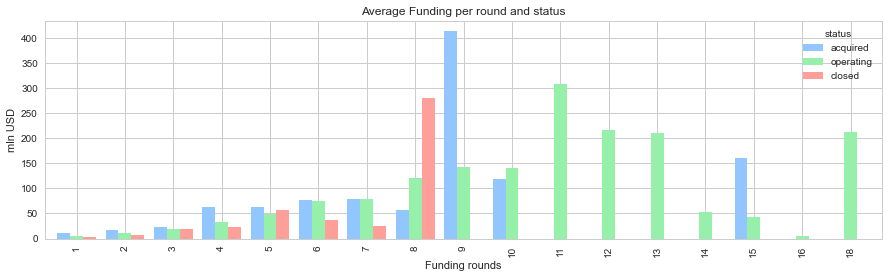

In [48]:
df_transposed.plot(y=['acquired', 'operating', 'closed'], kind='bar', figsize=(15,4), width=0.8)

plt.xlabel('Funding rounds')
plt.ylabel('mln USD')
plt.title('Average Funding per round and status')
plt.show();

### How much funding have the most populated markets received over years?

In the general overview, we had a look at most popular markets as seen by number of startups operating in that market and most popular markets for investors in terms of funding received. The heatmap and line chart below instead provide an overview of the most popular markets (by number of startups) funding has evolved over years. 

Both visualizations show interesting pattern in the investment landscape of these markets. For example we can see how E-commerce mobile investments peaked around the early 90s with E-commerce then taking the lead in the 2000s.

In [ ]:
top_market = df.market.value_counts()[:5].index.tolist()
top_city = df.city.value_counts()[:10].index.tolist()

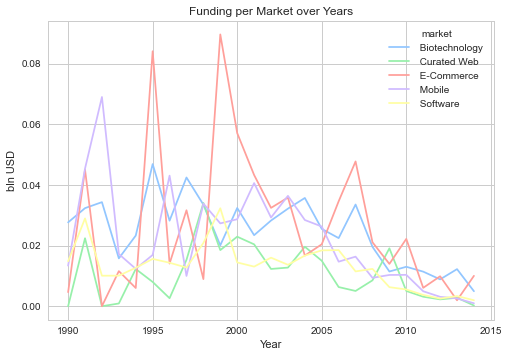

In [15]:
market_ovr = pd.pivot_table(df[df.market.\
                   isin(top_market)],\
               values='funding_total_usd', index='founded_at', \
              columns='market', aggfunc='mean').fillna(0)
market_ovr.plot();
plt.xlabel('Year')
plt.ylabel('bln USD')
plt.title('Funding per Market over Years');


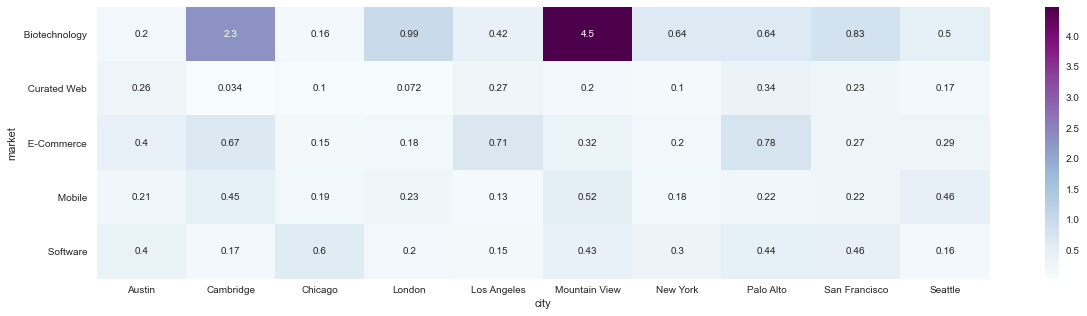

In [58]:
plt.figure(figsize=(20,5))
heat_mp = pd.pivot_table(df[df.market.\
                   isin(top_market)\
                  &df.city.isin(top_city)], \
               values='funding_total_usd', index='market', \
              columns='city', aggfunc='median').fillna(0)


sns.heatmap(heat_mp*100, annot=True, cmap = 'BuPu')
plt.show()


### What is the relationship between the most popular markets and cities chosen by startups and the funding they have received?

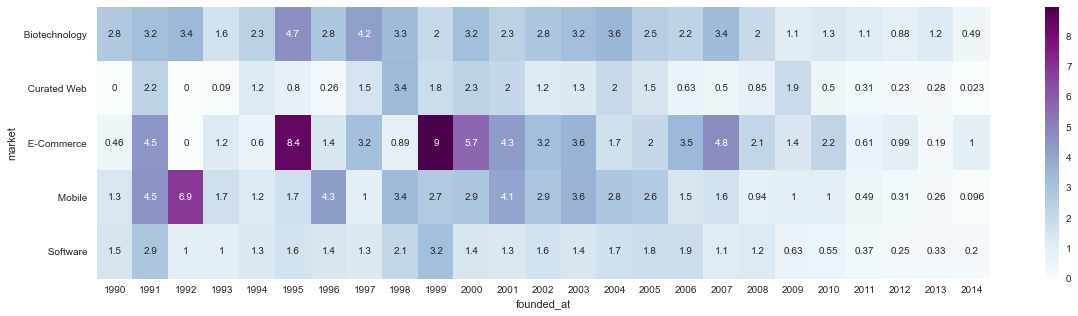

In [59]:
plt.figure(figsize=(20,5))
top_market = df.market.\
               value_counts()[:5].index.tolist()


heat_mp = pd.pivot_table(df[df.market.\
                   isin(top_market)],\
               values='funding_total_usd', index='market', \
              columns='founded_at', aggfunc='mean').fillna(0)


sns.heatmap(heat_mp* 100, annot=True, cmap = 'BuPu')
plt.show()